In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f1 = pd.read_csv(r"C:\Users\anurag\Desktop\DATA SCIENCE\Big Mart Sales Prediction\test_file.csv")
f2 = pd.read_csv(r"C:\Users\anurag\Desktop\DATA SCIENCE\Big Mart Sales Prediction\train_file.csv")

In [3]:
data = f1.append(f2)

In [4]:
data.shape

(14204, 12)

In [5]:
data.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Item_Weight

In [9]:
data.Item_Weight.isnull().sum()

2439

In [10]:
#sns.boxplot(data.Item_Fat_Content,data["Item_Weight"].fillna("missing"))
#plt.figure(figsize=(15,10))
#sns.boxplot(data.Item_Type,data["Item_Weight"].fillna("missing"))

# fill missing numeric value Item_Weight1  

In [11]:
data["Item_Weight"]=data["Item_Weight"].fillna(data['Item_Weight'].groupby(data['Item_Type']).transform('mean'))

In [12]:
data.Item_Weight.isna().sum()

0

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

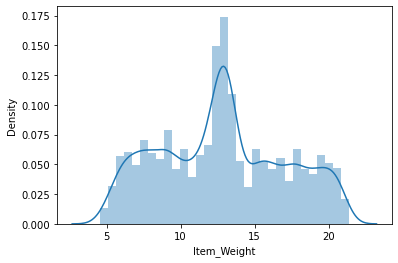

In [13]:
sns.distplot(data["Item_Weight"])

In [14]:
m3s=data["Item_Weight"].mean()+3*data["Item_Weight"].std()
per99=np.percentile(data["Item_Weight"],99)
iqr=(np.percentile(data["Item_Weight"],75)-np.percentile(data["Item_Weight"],25))*3+np.percentile(data["Item_Weight"],75)
print('m3s--',m3s)
print('per99--',per99)
print('iqr--',iqr)

m3s-- 25.515778399546807
per99-- 20.85
iqr-- 36.099999999999994


In [15]:
np.percentile(data.Item_Weight,99)

20.85

In [16]:
data["Item_Weight"]=np.where(data["Item_Weight"]>per99,per99,data["Item_Weight"])

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

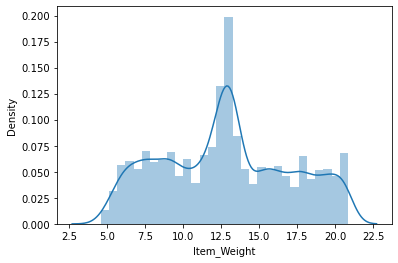

In [17]:
sns.distplot(data["Item_Weight"])

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

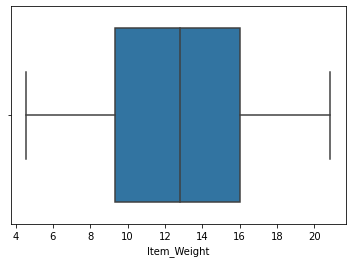

In [18]:
sns.boxplot(data["Item_Weight"])

# Item_Fat_Content

In [19]:
data.loc[data.Item_Fat_Content=="LF","Item_Fat_Content"]="Low Fat"
data.loc[data.Item_Fat_Content=="reg","Item_Fat_Content"]="Regular"
data.loc[data.Item_Fat_Content=="low fat","Item_Fat_Content"]="Low Fat"

In [20]:
data["Item_Weight"].value_counts()
#data.Item_Weight.isnull().sum()

13.194406    346
12.865732    336
13.337977    263
12.569323    251
13.238358    195
            ... 
6.150000       7
8.770000       7
7.850000       6
9.035000       6
4.615000       6
Name: Item_Weight, Length: 426, dtype: int64

# Outlet_Size

In [21]:
data.Outlet_Size.isnull().sum()

4016

In [22]:
#pd.crosstab(data['Outlet_Identifier'].fillna("missing"),data.Outlet_Size)
pd.crosstab(data['Outlet_Size'].fillna("missing"),data.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0
missing,0,3091,925


In [23]:
data.loc[(data.Outlet_Location_Type=="Tier 3") & (data.Outlet_Size.isna()),"Outlet_Size"]="Small"
#data.loc[(data.Outlet_Location_Type=="Tier 3") & (data.Outlet_Size.isna()),"Outlet_Size"]="Medium"

In [24]:
pd.crosstab(data['Outlet_Size'].fillna("missing"),data.Outlet_Identifier)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Size,,,,,,,,,,
High,0,1553,0,0,0,0,0,0,0,0
Medium,0,0,0,1546,0,1559,0,0,0,1550
Small,925,0,0,0,880,0,1550,0,1550,0
missing,0,0,1543,0,0,0,0,1548,0,0


In [25]:
data.loc[(data.Outlet_Identifier=="OUT017").fillna("missing"),"Outlet_Size"]="Small"
data.loc[(data.Outlet_Identifier=="OUT045").fillna("missing"),"Outlet_Size"]="Medium"

In [26]:
data['Outlet_Size'].isna().sum()

0

# Item_Weight

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

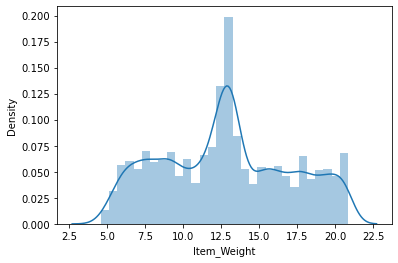

In [27]:
sns.distplot((data.Item_Weight))

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

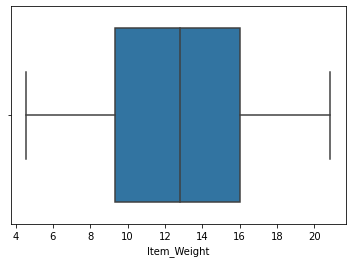

In [28]:
sns.boxplot(data.Item_Weight)

# Item_Visibility

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

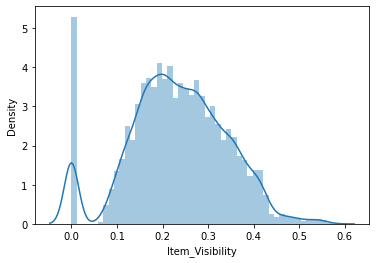

In [29]:
sns.distplot(np.sqrt(data.Item_Visibility))

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

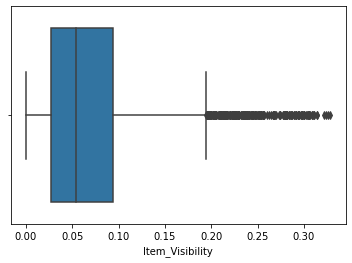

In [30]:
sns.boxplot(data.Item_Visibility)

In [31]:
# m+3*sd
m=data.Item_Visibility.mean()
sd=data.Item_Visibility.std()
print("m3s -",m+3*sd)
m3s=m+3*sd

#99per
per99=np.percentile(data.Item_Visibility,99)
print("99per -",per99)

#iqr
iqr=(np.percentile(data.Item_Visibility,75)-np.percentile(data.Item_Visibility,25))*1.5 + np.percentile(data.Item_Visibility,75)
print("iqr -",iqr)


m3s - 0.22032856581926274
99per - 0.2303851588199999
iqr - 0.19453961000000003


In [32]:
data.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [33]:
#sns.distplot(np.sqrt(data.Item_Visibility))
print("m3s -",data.loc[data.Item_Visibility>m3s,"Item_Visibility"].count())
print("per99 -",data.loc[data.Item_Visibility>per99,"Item_Visibility"].count())
print("iqr -",data.loc[data.Item_Visibility>iqr,"Item_Visibility"].count())

m3s - 173
per99 - 143
iqr - 261


In [34]:
data['Item_Visibility'] = np.where(data.Item_Visibility>per99,per99,data.Item_Visibility)

In [35]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.065558
std          0.049957
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.230385
Name: Item_Visibility, dtype: float64

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

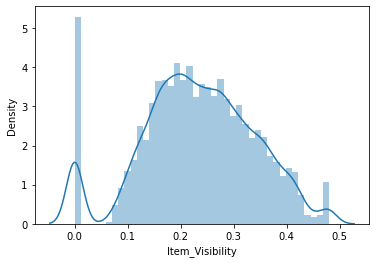

In [36]:
sns.distplot(np.sqrt(data['Item_Visibility']))

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

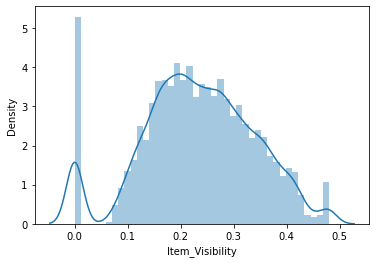

In [37]:
sns.distplot(np.sqrt(data['Item_Visibility']))

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

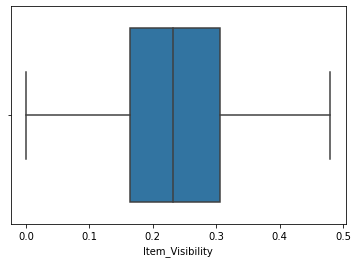

In [38]:
sns.boxplot(np.sqrt(data['Item_Visibility']))

# Item_MRP

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

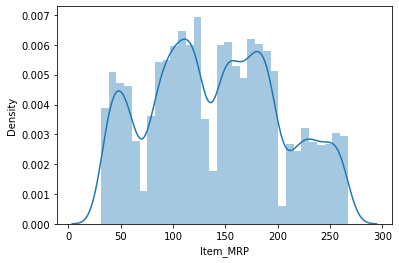

In [39]:
sns.distplot(data.Item_MRP)

C:\Users\anurag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

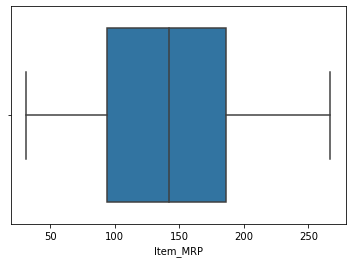

In [40]:
sns.boxplot(data.Item_MRP)

In [41]:
data.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [42]:
m3s=data.Item_MRP.mean()+3*data.Item_MRP.std()
print(m3s)

per99=np.percentile(data.Item_MRP,99)
print(per99)

q3=np.percentile(data.Item_MRP,75)
q1=np.percentile(data.Item_MRP,25)

iqr=(q3-q1)*1.5+q3
print(iqr)

print("m3s -",data.loc[data.Item_MRP>m3s,"Item_MRP"].count())
print("per99 -",data.loc[data.Item_MRP>per99,"Item_MRP"].count())
print("iqr -",data.loc[data.Item_MRP>iqr,"Item_MRP"].count())

327.26579130421885
262.759322
323.621
m3s - 0
per99 - 143
iqr - 0


C:\Users\anurag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

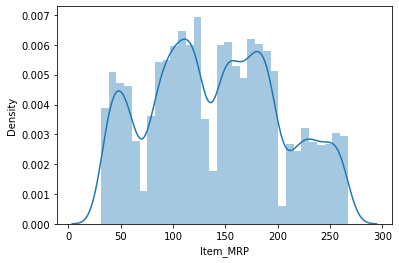

In [43]:
sns.distplot(data.Item_MRP)

# Item_Fat_Content

In [44]:
print(data.Item_Fat_Content.value_counts())
print(data.Item_Fat_Content.isnull().sum())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
0


# Item_Type

In [45]:
print(data.Item_Type.value_counts())
print(data.Item_Type.isnull().sum())

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
0


# Outlet_Identifier

In [46]:
print(data.Outlet_Identifier.value_counts())
print(data.Outlet_Identifier.isnull().sum())

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
0


# Outlet_Establishment_Year

In [47]:
print(data.Outlet_Establishment_Year.value_counts())
print(data.Outlet_Establishment_Year.isnull().sum())

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64
0


# Outlet_Size

In [48]:
print(data.Outlet_Size.value_counts())
print(data.Outlet_Size.isnull().sum())

Small     6448
Medium    6203
High      1553
Name: Outlet_Size, dtype: int64
0


# Outlet_Location_Type

In [49]:
print(data.Outlet_Location_Type.value_counts())
print(data.Outlet_Location_Type.isnull().sum())

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
0


# Outlet_Type

In [70]:
print(data.Outlet_Type.value_counts())
print("----------")
print(data.Outlet_Type.isnull().sum())

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64
----------
0


In [51]:
data1 = pd.get_dummies(data,drop_first=True) 

In [52]:
print(data1.info())
print('-----------')
print(data1.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 8522
Columns: 1595 entries, Item_Weight to Outlet_Type_Supermarket Type3
dtypes: float64(4), int64(1), uint8(1590)
memory usage: 22.7 MB
None
-----------
(14204, 1595)


In [71]:
data1.isna().sum()

Item_Weight                         0
Item_Visibility                     0
Item_MRP                            0
Outlet_Establishment_Year           0
Item_Outlet_Sales                5681
                                 ... 
Outlet_Location_Type_Tier 2         0
Outlet_Location_Type_Tier 3         0
Outlet_Type_Supermarket Type1       0
Outlet_Type_Supermarket Type2       0
Outlet_Type_Supermarket Type3       0
Length: 1595, dtype: int64

In [53]:
train = data1.loc[data1.Item_Outlet_Sales.notnull(),]

In [54]:
test = data1.loc[data1.Item_Outlet_Sales.isnull(),]

In [55]:
train.shape

(8523, 1595)

In [56]:
test.shape

(5681, 1595)

In [57]:
f1.shape

(5681, 11)

In [58]:
y_train = train["Item_Outlet_Sales"]

In [59]:
x_train = train.drop("Item_Outlet_Sales",axis=1)

In [60]:
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [61]:
x_test = test.drop("Item_Outlet_Sales",axis=1)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [64]:
y_pred = regressor.predict(x_test)

In [65]:
y_pred

array([1685.87748977, 1610.29322485, 2522.43732761, ..., 2048.23450938,
       2674.67284744, 1758.64584064])

In [66]:
submission = pd.DataFrame({"Item_Identifier":f1.Item_Identifier,"Outlet_Identifier":f1.Outlet_Identifier,
                          "Item_Outlet_Sales":y_pred})

In [67]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1685.877490
1,FDW14,OUT017,1610.293225
2,NCN55,OUT010,2522.437328
3,FDQ58,OUT017,2101.244990
4,FDY38,OUT027,5237.442434


In [68]:
submission.to_csv("C:/Users/anurag/Desktop/DATA SCIENCE/Big Mart Sales Prediction/solution1_sales.csv",index=False)